In [1]:
#import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#making dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 #uniformly distributed b/w -3 and +3, since random function originally returns b/w 0 and 1
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

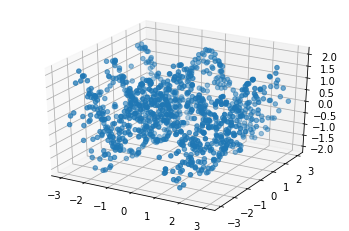

In [3]:
#plotting function
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [8]:
#build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape = (2, ), activation = 'relu'), #no dropout layer yielded better results
                                    tf.keras.layers.Dense(1)
])

In [9]:
#compile the model
opt = tf.keras.optimizers.Adam(0.01) #learning rate of 0.01 is used instead of the default
model.compile(
    optimizer = opt,
    loss = 'mse'
)

In [10]:
#fit the data
r = model.fit(X, Y, epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9712
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9233
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9166
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8730
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8277
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7776
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7337
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6521
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5920
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5586
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5480
Epoch 12/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5428
Epoch 13/200
32/32 [=================

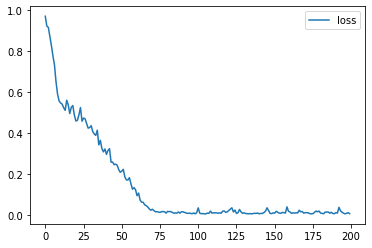

In [11]:
#plotting loss
plt.plot(r.history['loss'], label = 'loss')
plt.legend()
plt.show()

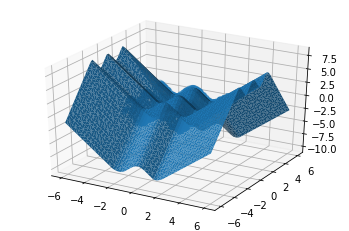

In [12]:
#plotting prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)
#surface plot
line = np.linspace(-3, 3, 50) #50 pts b/w -3, +3
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten() #flatten Nx1 to N length vector
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()

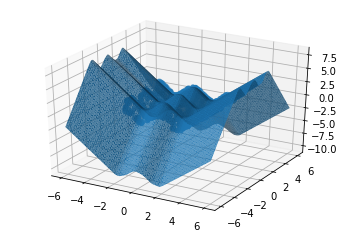

In [ ]:
#if we create a grid of range larger than the given data, it predicts a linear curve and not a periodic one, since our activation function used is linear and not periodic
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], Y)
#surface plot
line = np.linspace(-6, 6, 100) #50 pts b/w -6, +6
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten() #flatten Nx1 to N length vector
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()